<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%976_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

f(x) =
                                                                 2             ↪
                     -42.0138888888889⋅(0.0909090909090909⋅x - 1)              ↪
3.33333333333333⋅√2⋅ℯ                                                2.9166666 ↪
────────────────────────────────────────────────────────────────── + ───────── ↪
                                √π                                             ↪

↪                                                 2
↪             -19.53125⋅(0.0666666666666667⋅x - 1) 
↪ 6666667⋅√2⋅ℯ                                     
↪ ─────────────────────────────────────────────────
↪                    √π                            

Indefinite integral  F(x) = ∫ f(x) dx =
√2⋅(4.94974746830583⋅erf(0.294627825494395⋅x - 4.41941738241592) + 2.828427124 ↪

↪ 74619⋅erf(0.58925565098879⋅x - 6.48181216087669))

Definite integral ∫_9^18 f(x) dx (exact):
14.178654163478⋅√2

Definite integral (numeric): 20.05164501
Average over [9,18]: 2.227960557


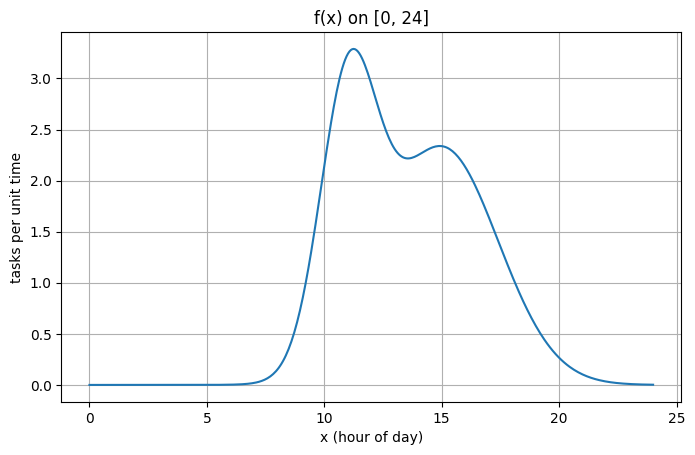

In [1]:
# --- Imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Symbols & constants
x = sp.symbols('x', real=True)
pi = sp.pi

mu1, sigma1, w1 = sp.Integer(11), sp.Float(1.2), sp.Integer(4)
mu2, sigma2, w2 = sp.Integer(15), sp.Float(2.4), sp.Integer(7)
a, b = sp.Integer(9), sp.Integer(18)

# --- Function (дві гаусіани з вагами, помножені на 2)
f = 2 * (
    w1 / (sigma1 * sp.sqrt(2*pi)) * sp.exp(-sp.Rational(1,2) * ((x-mu1)/sigma1)**2) +
    w2 / (sigma2 * sp.sqrt(2*pi)) * sp.exp(-sp.Rational(1,2) * ((x-mu2)/sigma2)**2)
)

# --- Indefinite integral (SymPy)
F = sp.integrate(f, x)             # символічно
F_simpl = sp.simplify(F)

# --- Definite integral on [a,b]
I_ab_exact = sp.integrate(f, (x, a, b))
I_ab_num = sp.N(I_ab_exact, 10)
avg_ab = I_ab_num / (b - a)

# --- Print results
print("f(x) =")
sp.pprint(f)
print("\nIndefinite integral  F(x) = ∫ f(x) dx =")
sp.pprint(F_simpl)
print("\nDefinite integral ∫_{}^{} f(x) dx (exact):".format(a, b))
sp.pprint(I_ab_exact)
print("\nDefinite integral (numeric):", I_ab_num)
print("Average over [9,18]:", avg_ab)

# --- Plot on [0,24]
xs = np.linspace(0, 24, 400)
f_np = sp.lambdify(x, f, "numpy")
ys = f_np(xs)

plt.figure(figsize=(8,4.8))
plt.plot(xs, ys)
plt.title("f(x) on [0, 24]")
plt.xlabel("x (hour of day)")
plt.ylabel("tasks per unit time")
plt.grid(True)
plt.show()
